In [1]:
import numpy as np
import astropy.units as u
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from importlib import reload
from astropy.io import fits

from matplotlib.colors import LogNorm
from matplotlib.patches import Circle

from esc_psf.math_module import xp, xcipy, ensure_np_array
from esc_psf import utils
import esc_psf.esc_fraunhofer as esc

wavelength_c = 650e-9

wfe_data = utils.load_pickle('../data/example_wfe_data.pkl')


/home/kianmilani/miniconda3/envs/km311env/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
2025-05-27 09:28:21,276	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


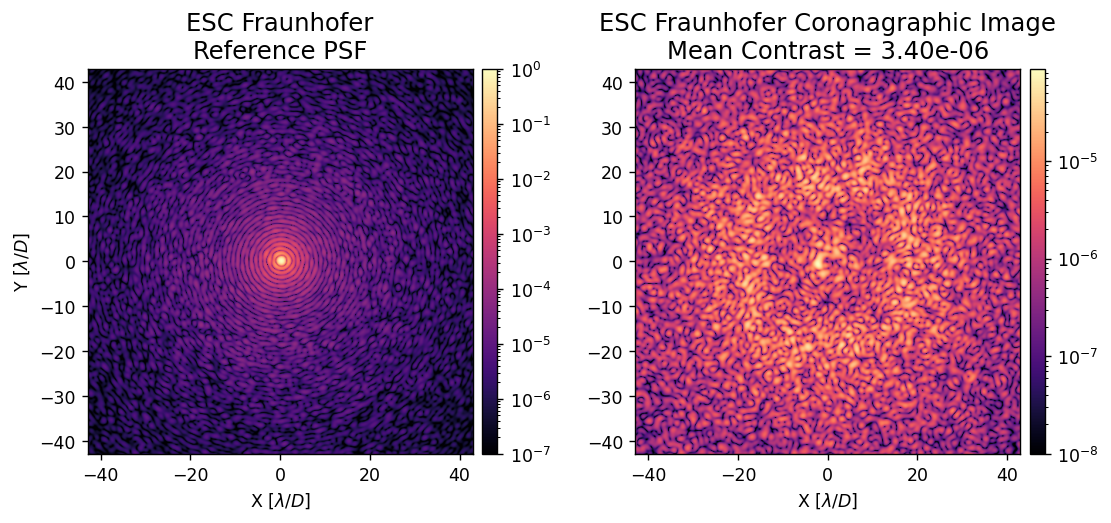

In [8]:
reload(esc)
reload(utils)

M = esc.single(
    dm_ref=wfe_data['DM_FLAT'],
)
M.PREFPM_AMP = wfe_data['PREFPM_AMP']
M.PREFPM_OPD = wfe_data['PREFPM_OPD']
M.POSTFPM_AMP = wfe_data['POSTFPM_AMP']
M.POSTFPM_OPD = wfe_data['POSTFPM_OPD']
M.RLS_AMP = wfe_data['RLS_AMP']
M.RLS_OPD = wfe_data['RLS_OPD']

M.ncamsci = 500
M.ncamlo = 96
# M.llowfsc_defocus = 2.75e-3

iwa = 3
owa = 10
control_mask = utils.create_annular_focal_plane_mask(
    M.ncamsci, 
    M.camsci_pxscl_lamD, 
    iwa, 
    owa,  
    # edge=iwa,
    rotation=90,
)

M.use_vortex = 0
ref_psf = M.snap_camsci()
M.Imax_ref = xp.max(ref_psf)

M.use_vortex = 1
camsci_im0 = M.snap_camsci()
mean_contrast = xp.mean(camsci_im0[control_mask])

utils.imshow(
    [ref_psf/M.Imax_ref, camsci_im0],
    titles=['ESC Fraunhofer\nReference PSF', 
            f'ESC Fraunhofer Coronagraphic Image\nMean Contrast = {mean_contrast:.2e}',], 
    title_fzs=[14]*2,
    xlabels=['X [$\lambda/D$]']*2,
    ylabels=['Y [$\lambda/D$]'],
    pxscls=2*[M.camsci_pxscl_lamDc],
    norms=[LogNorm(1e-7), LogNorm(1e-8)], 
    wspace=0.3,
)

In [9]:
%timeit M.snap_camsci()

13.1 ms ± 272 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


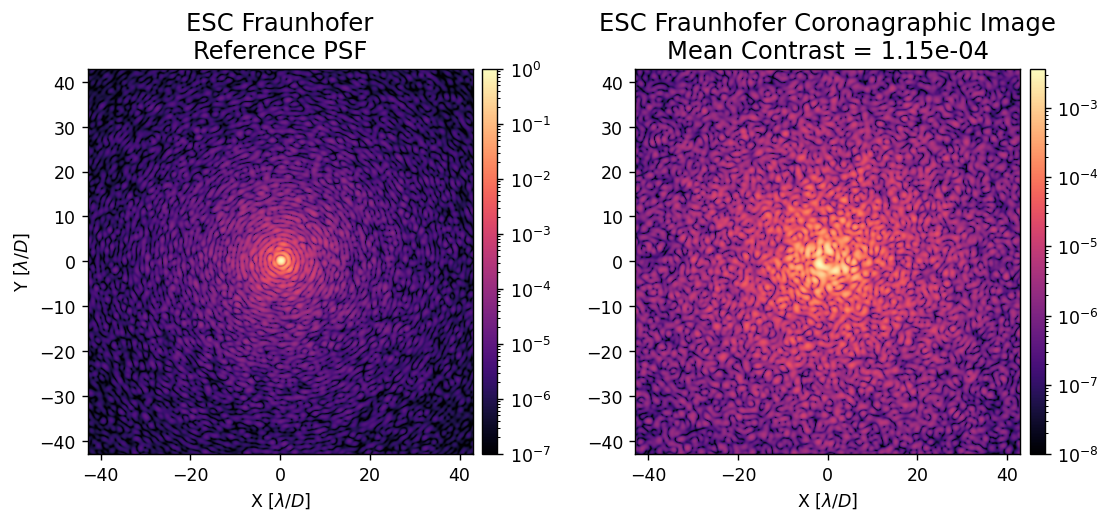

In [14]:
reload(esc)
reload(utils)

M = esc.single(
    total_pupil_diam=3.0,
    dm_beam_diam=9.351e-3*48/34,
    Nact=48,
    # dm_ref=wfe_data['DM_FLAT'],
)
M.PREFPM_AMP = wfe_data['PREFPM_AMP']
M.PREFPM_OPD = wfe_data['PREFPM_OPD']
M.POSTFPM_AMP = wfe_data['POSTFPM_AMP']
M.POSTFPM_OPD = wfe_data['POSTFPM_OPD']
M.RLS_AMP = wfe_data['RLS_AMP']
M.RLS_OPD = wfe_data['RLS_OPD']

M.ncamsci = 500
M.ncamlo = 96
# M.llowfsc_defocus = 2.75e-3

iwa = 3
owa = 10
control_mask = utils.create_annular_focal_plane_mask(
    M.ncamsci, 
    M.camsci_pxscl_lamD, 
    iwa, 
    owa,  
    # edge=iwa,
    rotation=90,
)

M.use_vortex = 0
ref_psf = M.snap_camsci()
M.Imax_ref = xp.max(ref_psf)

M.use_vortex = 1
camsci_im0 = M.snap_camsci()
mean_contrast = xp.mean(camsci_im0[control_mask])

utils.imshow(
    [ref_psf/M.Imax_ref, camsci_im0],
    titles=['ESC Fraunhofer\nReference PSF', 
            f'ESC Fraunhofer Coronagraphic Image\nMean Contrast = {mean_contrast:.2e}',], 
    title_fzs=[14]*2,
    xlabels=['X [$\lambda/D$]']*2,
    ylabels=['Y [$\lambda/D$]'],
    pxscls=2*[M.camsci_pxscl_lamDc],
    norms=[LogNorm(1e-7), LogNorm(1e-8)], 
    wspace=0.3,
)